In [117]:
import numpy as np 
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
from collections import Counter 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [118]:
#loading iris data
iris = load_iris()

X = iris.data  
y = iris.target

#shuffle data
X , y = shuffle(X , y , random_state=42)

#split the data to train and test set 
X_train ,x_test ,y_train ,y_test = train_test_split(X , y ,test_size = 0.2 ,random_state=42)

# Print the shape of the dataset after take a set for test 
print("Shape of the features in X_train:", X_train.shape)
print("Shape of the target variable in y_train:", y_train.shape)

Shape of the features in X_train: (120, 4)
Shape of the target variable in y_train: (120,)


In [119]:
# function to calculate distance between unseen point and all points in the training set
def euclidean_distance(x1 , x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance 

In [120]:
#implementation of KNN model 
def KNN(x_train ,y_train ,x_test ,k ):
    ypred = []
    for sample in x_test:
        distances = []
        for x in X_train:
            distances.append(euclidean_distance(sample ,x))  
        k_indices = np.argsort(distances)[:k]  # indices for the k nearest points 
        k_nearest_labels = [y_train[i] for i in k_indices] # labels for k_indices 
    
# get the most common one to be the label for unseen point
        most_common = Counter(k_nearest_labels).most_common()
        ypred.append( most_common[0][0])
    return ypred

In [121]:
#calculate accuracy for every k 
k_list = [3 , 80 , 100]
for k in k_list:
    ypred = KNN(X_train ,y_train ,x_test,k)
    ypred = np.array(ypred)
    acc = np.sum(ypred == y_test)/len(y_test)
    print(f'Accuracy for K = {k} ==>{ acc *100} %')

Accuracy for K = 3 ==>100.0 %
Accuracy for K = 80 ==>86.66666666666667 %
Accuracy for K = 100 ==>83.33333333333334 %


# way to test the KNN model and visualize the Decision Boundry

In [122]:
# Create a mesh grid
x_min, x_max = X[:, 0].min()  , X[:, 0].max() 
y_min, y_max = X[:, 1].min()  , X[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
print(yy.shape)
XGrid = [xx, yy]
XGrid =np.array(XGrid)
XGrid = (XGrid.reshape(XGrid.shape[0],-1)).T

(241, 361)


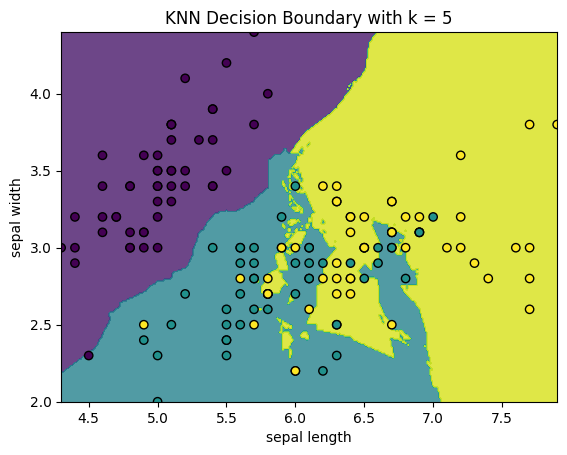

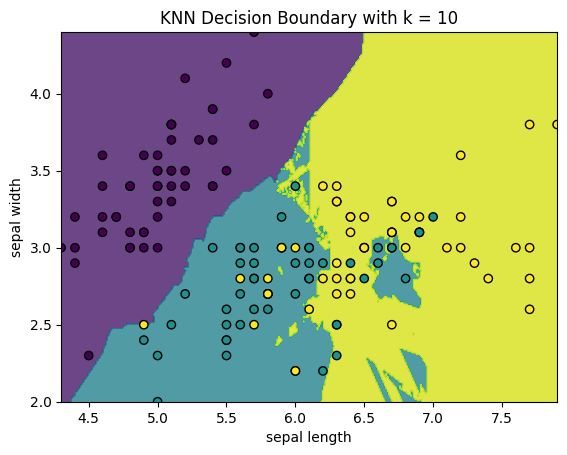

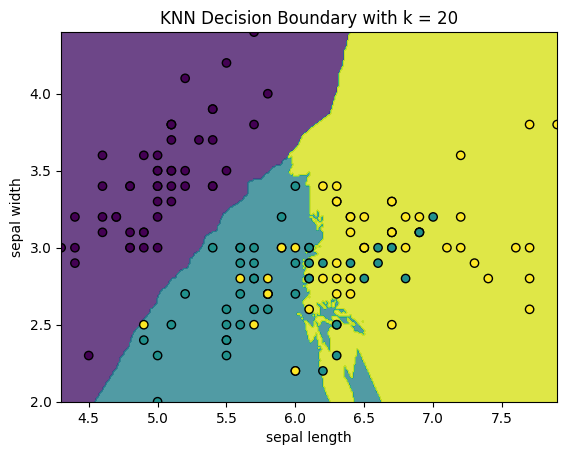

In [123]:
new_X = X[:, :2] # i take all sampels with the first two features
k_list = [5 , 10 , 20] # list of k_neighbor to test which one has the best accuracy

for k in k_list:
    ypred = []
    for sample in XGrid:
        distances = []
        for x in new_X:
            distances.append(euclidean_distance(sample ,x))  
        k_indices = np.argsort(distances)[:k]  # indices for the k nearest points 
        k_nearest_labels = [y[i] for i in k_indices] # labels for k_indices 
        
# get the most common one to be the label for unseen point
        most_common = Counter(k_nearest_labels).most_common()
        ypred.append(most_common[0][0])
    ypred =np.array(ypred)
    ypred = ypred.reshape(xx.shape)
    
# visualize the Decision Boundry for every K from K_list
    plt.contourf(xx, yy, ypred, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title(f'KNN Decision Boundary with k = {k}')
    plt.show()